# Data Science Project
## New York City - Census Data
    
**Danny Lam**<br>
**Julio Gutierrez**<br>
**Yannick Brossel**

<img src="NYC_map.png">

In [1]:
#Include libraries to import the dataset into a dataframe, compute calcuations, and also ignore warnings, respectively.
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 


In [2]:
#Read in the csv dataset using pandas.
rawData = pd.read_csv("nyc_census_tracts.csv")
#Output the dataframe to the screen for analysis.
rawData.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [3]:
#We made note of the data showing up to 2167 values per column with several columns appearing to have null values.
#Four columns seem redundant or irrelevant : CensusTract for exact block location, Borough which mirrors County column,
#IncomeErr and IncomePerCapErr which are standard error values
#Also, object types that should be transformed to category as necessary.
rawData.info()

#Create a variable "total" which is the number of rows and reflects the maximum number of non-null values.
total = 2167

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 36 columns):
CensusTract        2167 non-null int64
County             2167 non-null object
Borough            2167 non-null object
TotalPop           2167 non-null int64
Men                2167 non-null int64
Women              2167 non-null int64
Hispanic           2128 non-null float64
White              2128 non-null float64
Black              2128 non-null float64
Native             2128 non-null float64
Asian              2128 non-null float64
Citizen            2167 non-null int64
Income             2101 non-null float64
IncomeErr          2101 non-null float64
IncomePerCap       2121 non-null float64
IncomePerCapErr    2121 non-null float64
Poverty            2125 non-null float64
ChildPoverty       2107 non-null float64
Professional       2124 non-null float64
Service            2124 non-null float64
Office             2124 non-null float64
Construction       2124 non-null float64
Pro

In [4]:
#View the distinct values using unique function in the County column and the Borough column to confirm redundancy.
print(rawData["County"].unique())
print(rawData["Borough"].unique())

['Bronx' 'Kings' 'New York' 'Queens' 'Richmond']
['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


In [5]:
#Create a new Dataframe named MainDF without the four columns using the copy method followed by dropping the unwanted columns.
#Note: the deep parameter will allow for modification of our new dataframe without altering the "rawData" dataframe.
MainDF = rawData.copy(deep = True)
MainDF.drop(columns=["CensusTract", "Borough", "IncomeErr", "IncomePerCapErr"], inplace = True)

#Create a variable named "columns" for the number of columns shown in our MainDF.
columns = 32

#Confirm that our work has been without error by outputting the dataframe.
MainDF.head()

,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,6476,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,3639,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,4100,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,3536,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,1557,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [6]:
#Visualize the proportion of non-null values per column by using the count function and dividing it by the maximum number of
#non-null values
MainDF.count()/total

#Note many columns are showing null-values but with marginal amounts (lowest is 4% of null values in a column)

County          1.000000
TotalPop        1.000000
Men             1.000000
Women           1.000000
Hispanic        0.982003
White           0.982003
Black           0.982003
Native          0.982003
Asian           0.982003
Citizen         1.000000
Income          0.969543
IncomePerCap    0.978772
Poverty         0.980618
ChildPoverty    0.972312
Professional    0.980157
Service         0.980157
Office          0.980157
Construction    0.980157
Production      0.980157
Drive           0.980157
Carpool         0.980157
Transit         0.980157
Walk            0.980157
OtherTransp     0.980157
WorkAtHome      0.980157
MeanCommute     0.971850
Employed        1.000000
PrivateWork     0.980157
PublicWork      0.980157
SelfEmployed    0.980157
FamilyWork      0.980157
Unemployment    0.980618
dtype: float64

In [7]:
#We believe a reasonable action to take is dropping any row where half the data or more is missing.
#This can be performed by dropping where the threshold of non-null values is half the number of columns present.
MainDF.dropna(thresh = (columns/2), inplace = True)

#The variable "total" must be updated to reflect the new maximum number of non-null values per column.
total = 2124

#Output the dataframe to determine the number of columns that have null-values.
#There are four columns will null values: Income, IncomePerCap, ChildPoverty, and MeanCommute
MainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 1 to 2165
Data columns (total 32 columns):
County          2124 non-null object
TotalPop        2124 non-null int64
Men             2124 non-null int64
Women           2124 non-null int64
Hispanic        2124 non-null float64
White           2124 non-null float64
Black           2124 non-null float64
Native          2124 non-null float64
Asian           2124 non-null float64
Citizen         2124 non-null int64
Income          2101 non-null float64
IncomePerCap    2118 non-null float64
Poverty         2124 non-null float64
ChildPoverty    2107 non-null float64
Professional    2124 non-null float64
Service         2124 non-null float64
Office          2124 non-null float64
Construction    2124 non-null float64
Production      2124 non-null float64
Drive           2124 non-null float64
Carpool         2124 non-null float64
Transit         2124 non-null float64
Walk            2124 non-null float64
OtherTransp     2124 non-nul

In [8]:
#Create a new DataFrame grouped by County holding only the four columns with null values and determine their means.
#These values will be used to fill the null values.
#Note: We chose not to take a mean for each column and use that value for filling because it may drastically by county.
#Ex. The average income in the Bronx is $39,000 meanwhile the income in New York is $83,000.
fillValues = MainDF.groupby(['County']).mean()[["Income", "IncomePerCap", "ChildPoverty", "MeanCommute"]]

#Dividing the dataframe with two forward slashes by one will simply truncate the value so it does not reflect decimal values.
fillValues = fillValues // 1

#Output the four columns average when grouped by "County".
print(fillValues)

           Income  IncomePerCap  ChildPoverty  MeanCommute
County                                                    
Bronx     39311.0       19532.0          37.0         42.0
Kings     54264.0       27869.0          27.0         41.0
New York  83351.0       69588.0          18.0         30.0
Queens    62336.0       27596.0          18.0         42.0
Richmond  72021.0       32022.0          16.0         42.0


In [9]:
#Create a list of variables that will hold the fill values for each of the four columns and their respective county.
#Note: four columns and five counties will lead to the creation of twenty variables.
#Note: It was much simpler to initialize the variables using their indexes.
IncomeBronx = fillValues.iloc[0,0]
IncomeKings = fillValues.iloc[1,0]
IncomeNY = fillValues.iloc[2,0]
IncomeQueens = fillValues.iloc[3,0]
IncomeRichmond = fillValues.iloc[4,0]
CapBronx = fillValues.iloc[0,1]
CapKings = fillValues.iloc[1,1]
CapNY = fillValues.iloc[2,1]
CapQueens = fillValues.iloc[3,1]
CapRichmond = fillValues.iloc[4,1]
ChildBronx = fillValues.iloc[0,2]
ChildKings = fillValues.iloc[1,2]
ChildNY = fillValues.iloc[2,2]
ChildQueens = fillValues.iloc[3,2]
ChildRichmond = fillValues.iloc[4,2]
CommuteBronx = fillValues.iloc[0,3]
CommuteKings = fillValues.iloc[1,3]
CommuteNY = fillValues.iloc[2,3]
CommuteQueens = fillValues.iloc[3,3]
CommuteRichmond = fillValues.iloc[4,3]

In [10]:
#General Overview for four repetitive functions

#Create functions that will take in two parameters: the "County" and one of the four columns with null values.
#The function will then execute on each row.
#If the row is showing a non-null value for the column of interest, then it will simply return its non-value.
#If the row is showing a null value for the column of interest, then it will fill that row with the appropriate variable for
#its respective county and column.




#The function "fillIncome" will be used to update the "Income" column by filling in rows with null values with the average
#income for their respective county.

#The parameter block is composed of two columns: the county and the income.
def fillIncome(Block):
    #Set up local variables for a row's county and income values.
    county, income = Block
    #If there is a null(missing) value and they hail from the Bronx then update the row with the average income for the Bronx.
    if (county == "Bronx") & (np.isnan(income)):
        return IncomeBronx
    #If there is a null(missing) value and they reside in Kings then update the row with the average income for the Kings.
    elif (county == "Kings") & (np.isnan(income)):
        return IncomeKings
    #If there is a null(missing) value and they reside in New York then update the row with the average income for the New York.
    elif (county == "New York") & (np.isnan(income)):
        return IncomeNY
    #If there is a null(missing) value and they reside in Queens then update the row with the average income for the Queens.
    elif (county == "Queens") & (np.isnan(income)):
        return IncomeQueens
    #If there is a null(missing) value and they reside in Richmond then update the row with the average income for the Richmond.
    elif (county == "Richmond") & (np.isnan(income)):
        return IncomeRichmond
    else:
    #All previous tests failed meaning that there was no null(missing) value and therefore we can simply return the non-null
    #value that is present
        return income

    
    #The function "fillCap" will be used to update the "IncomePerCap" column by filling in rows with null values with the
    #average income for their respective county.
def fillCap(Block):
    county, cap = Block
    if (county == "Bronx") & (np.isnan(cap)):
        return CapBronx
    elif (county == "Kings")& (np.isnan(cap)):
        return CapKings
    elif (county == "New York") & (np.isnan(cap)):
        return CapNY
    elif (county == "Queens") & (np.isnan(cap)):
        return CapQueens
    elif (county == "Richmond") & (np.isnan(cap)):
        return CapRichmond
    else:
        return cap

    #The function "fillChild" will be used to update the "ChildPoverty" column by filling in rows with null values with the
    #average income for their respective county.
def fillChild(Block):
    county, child = Block
    if (county == "Bronx") & np.isnan(child):
        return ChildBronx
    elif (county == "Kings") & np.isnan(child):
        return ChildKings
    elif (county == "New York") & np.isnan(child):
        return ChildNY
    elif (county == "Queens") & np.isnan(child):
        return ChildQueens
    elif (county == "Richmond") & np.isnan(child):
        return ChildRichmond
    else:
        return child

    #The function "fillCommute" will be used to update the "MeanCommute" column by filling in rows with null values with the
    #average income for their respective county.
def fillCommute(Block):
    county, commute = Block
    if (county == "Bronx") & np.isnan(commute):
        return CommuteBronx
    elif (county == "Kings") & np.isnan(commute):
        return CommuteKings
    elif (county == "New York") & np.isnan(commute):
        return CommuteNY
    elif (county == "Queens") & np.isnan(commute):
        return CommuteQueens
    elif (county == "Richmond") & np.isnan(commute):
        return CommuteRichmond
    else:
        return commute

In [11]:
#We will apply the created functions to their respective columns of interest ex. fillIncome applied to the "Income" column.
#Note: We will overwrite the output to columns of interest as it would be more efficient than creating new columns and dropping
#the older columns.
#Note: The county and column of interst are passed as parameters and we set axis to 1 to refer to the column values.

#This applied function will fill null values with the average "Income" by county and also leave non-null values unaffected.
MainDF["Income"] = MainDF[["County", "Income"]].apply(fillIncome, axis = 1)

#This applied function will fill null values with the average "IncomePerCap" by county and also leave non-null values unaffected.
MainDF["IncomePerCap"] = MainDF[["County", "IncomePerCap"]].apply(fillCap, axis = 1)

#This applied function will fill null values with the average "ChildPoverty" by county and also leave non-null values unaffected.
MainDF["ChildPoverty"] = MainDF[["County", "ChildPoverty"]].apply(fillChild, axis = 1)

#This applied function will fill null values with the average "MeanCommute" by county and also leave non-null values unaffected.
MainDF["MeanCommute"] = MainDF[["County", "MeanCommute"]].apply(fillCommute, axis = 1)


In [12]:
#Lastly, convert the column "County" from an object to a category type for later use with the creation of plots.
MainDF['County'] = MainDF['County'].astype('category')

In [13]:
#Confirm whether all values non-null values have been filled and if the column "County" was converted to a category type.
MainDF.info()

#Confirmed. The number of rows is 2124 with all of their fields having non-null values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 1 to 2165
Data columns (total 32 columns):
County          2124 non-null category
TotalPop        2124 non-null int64
Men             2124 non-null int64
Women           2124 non-null int64
Hispanic        2124 non-null float64
White           2124 non-null float64
Black           2124 non-null float64
Native          2124 non-null float64
Asian           2124 non-null float64
Citizen         2124 non-null int64
Income          2124 non-null float64
IncomePerCap    2124 non-null float64
Poverty         2124 non-null float64
ChildPoverty    2124 non-null float64
Professional    2124 non-null float64
Service         2124 non-null float64
Office          2124 non-null float64
Construction    2124 non-null float64
Production      2124 non-null float64
Drive           2124 non-null float64
Carpool         2124 non-null float64
Transit         2124 non-null float64
Walk            2124 non-null float64
OtherTransp     2124 non-n

In [14]:
#Another challenge noted is that many columns are defined in percentages, e.g. Percentages are given for the five ethnicities,
#the five job types, the six modes of commuting to work, and the four job sectors in which one is employed. This presents an
#for statistical testing because the population per block(row) are not equally distributed and thus taking averages of 
#percentages will give equal weight for both small and largely populated blocks.


#Conversion is necessary to raw numbers per column which can be done by using the total population when addressing ethnicity,
#and the total number of employed individuals when the job type, mode of commuting, and the job sector.



#Create a new dataframe called "ConvertedMain" which will hold the same data as MainDF but will undergo conversion from 
#percentages to decimal values.
ConvertedMain = MainDF.copy(deep = True)

In [15]:
#This function will perform the conversion from a percentage to a decimal value.
def percentageToValue(Block):
    #The two columns passed are its population number and the percentage for the column of interest.
    population, percentage = Block
    #The math is simply dividing the percentage by one hundred and multiplying by the population.
    value = (percentage/100) * population
    #We perform the code below to truncate any decimal values.
    value = percentage // 1
    #Return the decimal value for each row
    return value

In [16]:
#Apply the "percentageToValue" function to the ethnicity columns.
#Note: our population parameter will come from the "TotalPop" column because all people within the block have an ethnicity.
#Note: we will overwrite the column of interest rather than adding a new column and dropping the older column
ConvertedMain["Hispanic"] = ConvertedMain[["TotalPop", "Hispanic"]].apply(percentageToValue, axis = 1)
ConvertedMain["White"] = ConvertedMain[["TotalPop", "White"]].apply(percentageToValue, axis = 1)
ConvertedMain["Black"] = ConvertedMain[["TotalPop", "Black"]].apply(percentageToValue, axis = 1)
ConvertedMain["Native"] = ConvertedMain[["TotalPop", "Native"]].apply(percentageToValue, axis = 1)
ConvertedMain["Asian"] = ConvertedMain[["TotalPop", "Asian"]].apply(percentageToValue, axis = 1)


#Apply the "percentageToValue" function to the job type columns.
#Note: our population parameter will come from the "Employed" column rather than the "TotalPop" column because not everyone
#residing in the block is employed. Using the "TotalPop" would inflate the values because in reality the total number of
#employed individuals is lower.
ConvertedMain["Professional"] = ConvertedMain[["Employed", "Professional"]].apply(percentageToValue, axis = 1)
ConvertedMain["Service"] = ConvertedMain[["Employed", "Service"]].apply(percentageToValue, axis = 1)
ConvertedMain["Office"] = ConvertedMain[["Employed", "Office"]].apply(percentageToValue, axis = 1)
ConvertedMain["Construction"] = ConvertedMain[["Employed", "Construction"]].apply(percentageToValue, axis = 1)
ConvertedMain["Production"] = ConvertedMain[["Employed", "Production"]].apply(percentageToValue, axis = 1)

#Apply the "percentageToValue" function to the mode of commuting columns.
#Note: our population parameter will come from the "Employed" column rather than the "TotalPop" column because not everyone
#residing in the block is employed. Using the "TotalPop" would inflate the values because in reality the total number of
#employed individuals is lower.
ConvertedMain["Drive"] = ConvertedMain[["Employed", "Drive"]].apply(percentageToValue, axis = 1)
ConvertedMain["Carpool"] = ConvertedMain[["Employed", "Carpool"]].apply(percentageToValue, axis = 1)
ConvertedMain["Transit"] = ConvertedMain[["Employed", "Transit"]].apply(percentageToValue, axis = 1)
ConvertedMain["Walk"] = ConvertedMain[["Employed", "Walk"]].apply(percentageToValue, axis = 1)
ConvertedMain["OtherTransp"] = ConvertedMain[["Employed", "OtherTransp"]].apply(percentageToValue, axis = 1)
ConvertedMain["WorkAtHome"] = ConvertedMain[["Employed", "WorkAtHome"]].apply(percentageToValue, axis = 1)

#Apply the "percentageToValue" function to the job sector columns.
#Note: our population parameter will come from the "Employed" column rather than the "TotalPop" column because not everyone
#residing in the block is employed. Using the "TotalPop" would inflate the values because in reality the total number of
#employed individuals is lower.
ConvertedMain["PrivateWork"] = ConvertedMain[["Employed", "PrivateWork"]].apply(percentageToValue, axis = 1)
ConvertedMain["PublicWork"] = ConvertedMain[["Employed", "PublicWork"]].apply(percentageToValue, axis = 1)
ConvertedMain["SelfEmployed"] = ConvertedMain[["Employed", "SelfEmployed"]].apply(percentageToValue, axis = 1)
ConvertedMain["FamilyWork"] = ConvertedMain[["Employed", "FamilyWork"]].apply(percentageToValue, axis = 1)

In [17]:
#Output the dataframe to confirm that the columns reflect decimal values rather than percentages.
ConvertedMain.head()

,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1,Bronx,5403,2659,2744,75.0,2.0,16.0,0.0,4.0,3639,...,2.0,0.0,0.0,43.0,2308,80.0,16.0,2.0,0.0,7.7
2,Bronx,5915,2896,3019,62.0,3.0,30.0,0.0,0.0,4100,...,1.0,0.0,2.0,45.0,2675,71.0,25.0,2.0,0.0,9.5
3,Bronx,5879,2558,3321,65.0,1.0,32.0,0.0,0.0,3536,...,8.0,1.0,1.0,38.8,2120,75.0,21.0,3.0,0.0,8.7
4,Bronx,2591,1206,1385,55.0,9.0,29.0,0.0,2.0,1557,...,3.0,2.0,6.0,45.4,1083,76.0,15.0,7.0,0.0,19.2
5,Bronx,8516,3301,5215,61.0,1.0,31.0,0.0,3.0,5436,...,4.0,1.0,0.0,46.0,2508,71.0,21.0,7.0,0.0,17.2


## 1. Let's Consider our Population - Demographics

Questions <br> <br>
How many people reside in each county? <br>
Are there more males or females on average? <br>
Which counties have the most and least number of blocks? <br>
Which counties are most congested and which are the least congested? <br>
Is our Population normally distributed? <br>

In [18]:
#Include libraries for visualization and set inline to view output on Jupyter.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sns.set function. to use template styles. 
sns.set()

In [19]:
#Create a dataframe to group columns necessary to analyze the demographics.
Demographics = ConvertedMain[["County", "TotalPop", "Men", "Women", "Citizen"]].copy(deep = True)
Demographics.head()

,County,TotalPop,Men,Women,Citizen
1,Bronx,5403,2659,2744,3639
2,Bronx,5915,2896,3019,4100
3,Bronx,5879,2558,3321,3536
4,Bronx,2591,1206,1385,1557
5,Bronx,8516,3301,5215,5436


In [20]:
#Create a pivot table to analyze the sum, mean, and standard deviation of the columns
#using aggfunc parameters np.sum and np.mean
pivotDemo = pd.pivot_table(ConvertedMain, index= 'County', values= ["TotalPop", "Men", "Women", "Citizen"], aggfunc= [ np.sum, np.mean, np.std],margins=True)
#truncate values to remove the decimal
pivotDemo = pivotDemo // 1
pivotDemo

#Note: Total population = 8.4 million, Bronx = 1.4 million, Kings = 2.6 million
#NY = 1.6 million, Queens = 2.3 million, Richmond = .5 million
#Women > Men (400 thousand)
#Most congested = NY (5,800), Least congested = Kings  & Queens (3500 each)
#New York has a larger standard deviation(spread) than Kings and Queens for the TotalPop, 3000 vs 1400 & 2000
#Despite NY being less populated, it's spread is higher between population between the blocks

sum                               mean                           \
          Citizen      Men TotalPop    Women Citizen     Men TotalPop   Women   
County                                                                          
Bronx      813841   665314  1420654   755340  2429.0  1986.0   4240.0  2254.0   
Kings     1600119  1227036  2593184  1366148  2133.0  1636.0   3457.0  1821.0   
New York  1156884   769410  1629454   860044  4117.0  2738.0   5798.0  3060.0   
Queens    1367889  1115459  2301139  1185680  2104.0  1716.0   3540.0  1824.0   
Richmond   333158   228703   472481   243778  3084.0  2117.0   4374.0  2257.0   
All       5271891  4005922  8416912  4410990  2482.0  1886.0   3962.0  2076.0   

             std                           
         Citizen     Men TotalPop   Women  
County                                     
Bronx     1597.0  1118.0   2395.0  1301.0  
Kings      850.0   667.0   1379.0   751.0  
New York  2220.0  1432.0   3087.0  1710.0  
Queens    1160.0   938.0   1943.0  1034.0  
Richmond  1488.0   988.0   2065.0  1096.0  
All       1512.0  1036.0   2193.0  1189.0

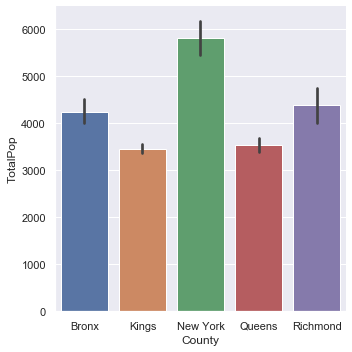

In [21]:
# Representation of the population mean per County:
sns.factorplot(x='County',y='TotalPop',data=Demographics,kind='bar')




In [22]:
#Create list for the Counties within our dataframe using the unique function.
Counties = list(Demographics["County"].unique())
#Create list for the "sum" values of "TotalPop" for each county with data gathered from our pivotDemo.
Sum = list(pivotDemo["sum"]["TotalPop"])
#Remove the margin value.
del Sum[-1]


Text(0, 0.5, 'Total Population')

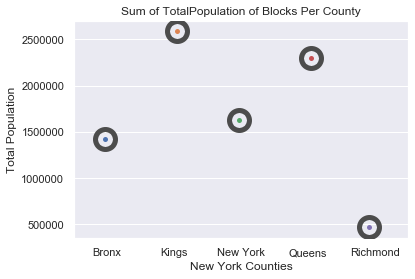

In [23]:
#Representation of the total population per county.
#Create the object
plt.figure()
#Use Counties as the x and Sum as the y values. Increase width for visual effect.
ax = sns.stripplot(Counties, Sum, linewidth = 20);
#Give an appropriate title
plt.title('Sum of TotalPopulation of Blocks Per County')
#Set x label
plt.xlabel('New York Counties')
#Set y label
plt.ylabel('Total Population')


Kings       750
Queens      650
Bronx       335
New York    281
Richmond    108
Name: County, dtype: int64


Text(0.5, 1.0, 'Number of Blocks per County')

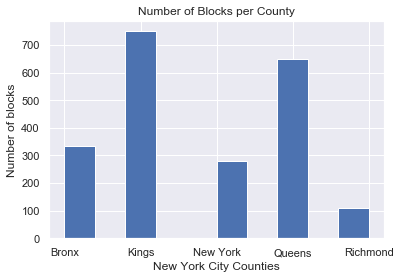

In [24]:
#Use the count function to determine the number of blocks per county
print(ConvertedMain['County'].value_counts())


#Create a bar graph to represent the number of blocks per county:
#call the hist function, pass it the county column of the dataframe
plt.hist(ConvertedMain['County'])

#X-axis label
plt.xlabel ('New York City Counties')

#Y-axis label
plt.ylabel('Number of blocks')

#Set title
plt.title("Number of Blocks per County")

stat = 954.85 p = 4.529638812870035e-208
Probably not Gaussian


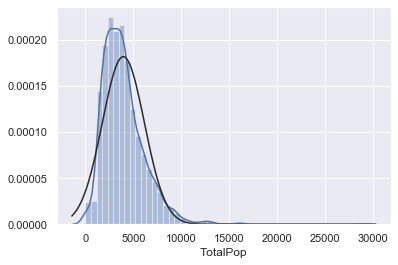

In [25]:
#Let us also see how the population is distributed:
#To help visualize whether it is normal we inlcude the library norm which
#will plot a normal distribution on top of our data
#Note: Black line is the normal distribution and blue line is that of the data
from scipy.stats import norm
sns.distplot(Demographics['TotalPop'], fit = norm, axlabel = "TotalPop")
#Note:The mean of each block is approximately 4000 and it is skewed to the right

#Include the library to perform hypothesis testing: normal distribution
from scipy.stats import normaltest
import scipy.stats as stats
#Set local variables for the test statistic and p value that are calculated
#by performing a normaltest on the "TotalPop"
stat, p = normaltest(Demographics["TotalPop"])
print("stat = {0:.2f} p = {1}".format(stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')
#Large sample sizes tend to fail the normality test
#There is strong evidence(from statistical testing) to reject the null hypothesis and suggest that the total population 
#is not normally distributed.

## 2. Wealth and Ethnic Disparities - Disparities

We would like to consider deeper topics such as what are the wealth and ethnic disparities among counties, if any? Thus, we created a second pivot table with a new set of questions. <br> <br>
Questions <br> <br>
What are the distribution of ethnicities per county?<br>
What are the disparities in median household income and income per capita per county? <br>
What are the disparities of Poverty and ChildPoverty per county? <br>
What are some, if any, correlations regarding income? <br>

In [26]:
#Create a dataframe to group columns necessary to analyze ethnic and income
#disparities between the counties.
Disparities = ConvertedMain[["County", "TotalPop", "Hispanic", "White", "Black", "Native", "Asian", "Income", "IncomePerCap", "Poverty", "ChildPoverty"]].copy(deep = True)


In [27]:
#Create a pivot table to analyze the sum and mean and of the columns
#using aggfunc parameters np.sum and np.mean
pivotDisp = pd.pivot_table(ConvertedMain, index= 'County', values= ["TotalPop", "Hispanic", "White", "Black", "Native", "Asian", "Income", "IncomePerCap", "Poverty", "ChildPoverty"], aggfunc= [ np.sum],margins=True)
pivotDisp = pivotDisp//1
pivotDisp


#Population: Asian = 1.1 million, Black = 1.8 million, Hispanic = 2.4 million, 
#Native = 15 thousand, White = 2.7 million
#Income: See below for graphic
#IncomePerCap: See below for graphic
#Poverty: 41,476 (Overall)
#Child Poverty: 51,930 (Overall)

sum                                                           \
            Asian    Black ChildPoverty Hispanic       Income IncomePerCap   
County                                                                       
Bronx      1152.0   9522.0      12638.0  17448.0   13169252.0    6543369.0   
Kings      7981.0  23201.0      20340.0  13322.0   40698683.0   20902487.0   
New York   3335.0   3670.0       5282.0   6242.0   23421892.0   19554385.0   
Queens    14464.0  12344.0      11894.0  16619.0   40518964.0   17937722.0   
Richmond    793.0   1128.0       1773.0   1956.0    7778293.0    3458424.0   
All       27725.0  49865.0      51930.0  55587.0  125587084.0   68396387.0   

                                            
         Native  Poverty TotalPop    White  
County                                      
Bronx      40.0   9859.0  1420654   4196.0  
Kings      76.0  16120.0  2593184  27661.0  
New York   39.0   4931.0  1629454  13508.0  
Queens     88.0   9143.0  2301139  17494.0  
Richmond    3.0   1421.0   472481   6530.0  
All       246.0  41476.0  8416912  69389.0

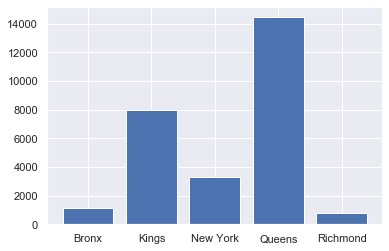

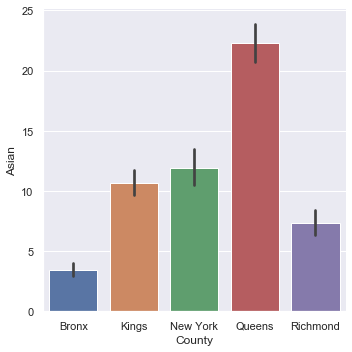

In [28]:
#Visualize the different distribution of ethnicities per counties with a provided estimate of error.

#Use a bar chart to visualize the "Asian" population by county.
#Create a list for the sum of Asian population per County from pivotDisp
Asian = list(pivotDisp["sum"]["Asian"])
#Create a list of the counties from the pivotDisp (different way to create the
#same list
county = pivotDisp.index.tolist()

#Remove margin values (totals)
del Asian[-1]
del county[-1]
import matplotlib.pyplot as plt

#Displays the total(sum of the) "Asian" population by County.
plt.bar(county, Asian, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Asian" population by County.
sns.catplot(x="County", y= "Asian", kind="bar", data = Disparities)



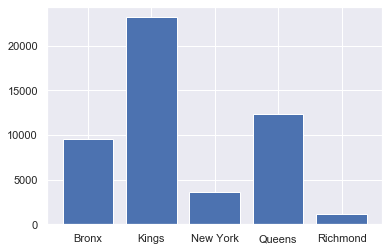

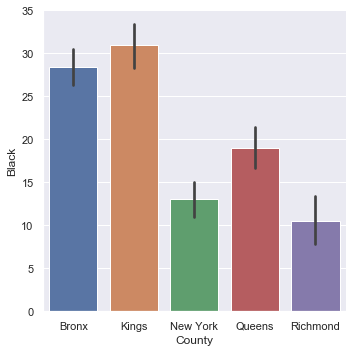

In [29]:
#Use a bar chart to visualize the "Black" population by county.
#Create a list for the sum of Black population per County from pivotDisp
Black = list(pivotDisp["sum"]["Black"])


#Remove margin values (totals)
del Black[-1]


#Displays the total(sum of the) "Black" population by County.
plt.bar(county, Black, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Asian" population by County.
sns.catplot(x="County", y= "Black", kind="bar", data = Disparities)

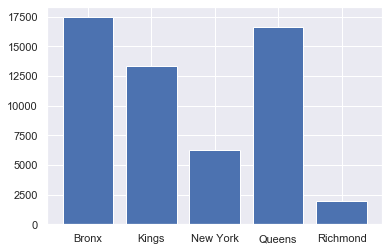

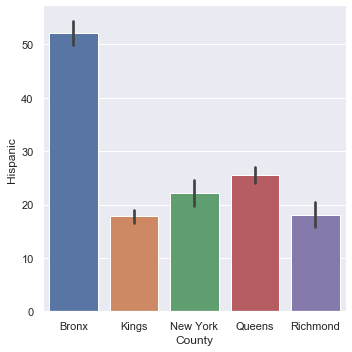

In [30]:
#Use a bar chart to visualize the "Hispanic" population by county.
#Create a list for the sum of Hispanic population per County from pivotDisp
Hispanic = list(pivotDisp["sum"]["Hispanic"])


#Remove margin values (totals)
del Hispanic[-1]


#Displays the total(sum of the) "Hispanic" population by County.
plt.bar(county, Hispanic, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Hispanic" population by County.
sns.catplot(x="County", y= "Hispanic", kind="bar", data = Disparities)

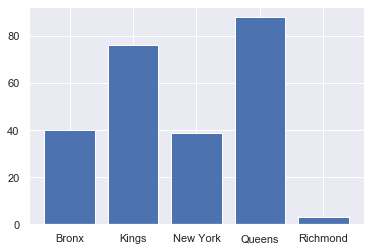

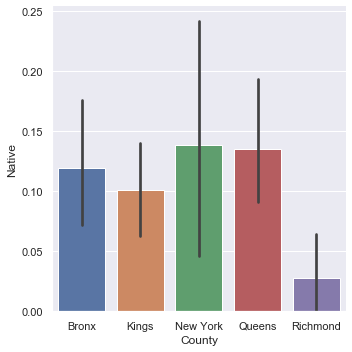

In [31]:
#Use a bar chart to visualize the "Native" population by county.
#Create a list for the sum of Native population per County from pivotDisp
Native = list(pivotDisp["sum"]["Native"])


#Remove margin values (totals)
del Native[-1]


#Displays the total(sum of the) "Native" population by County.
plt.bar(county, Native, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Native" population by County.
sns.catplot(x="County", y= "Native", kind="bar", data = Disparities)

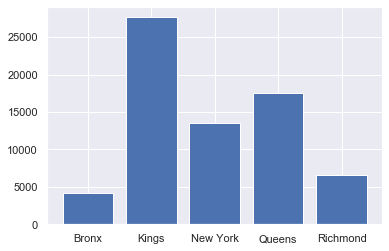

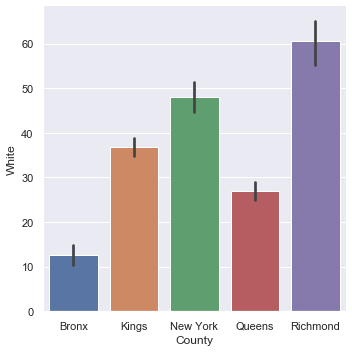

In [32]:
#Use a bar chart to visualize the "WhiteWhite" population by county.
#Create a list for the sum of White population per County from pivotDisp
White = list(pivotDisp["sum"]["White"])


#Remove margin values (totals)
del White[-1]


#Displays the total(sum of the) "White" population by County.
plt.bar(county, White, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "White" population by County.
sns.catplot(x="County", y= "White", kind="bar", data = Disparities)

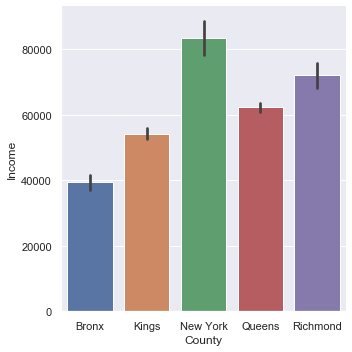

In [33]:
#Visualize the different distribution of average "Median Household Income" per counties with a provided estimate of error.

#Displays the mean of the total "Median Household Income" by County.
sns.catplot(x="County", y= "Income", kind="bar", data = Disparities)

#New York, Richmond, and Queens demonstrating median household incomes greater than the national average(60,000).
#Bronx and Kings showing values below the national average median household income.

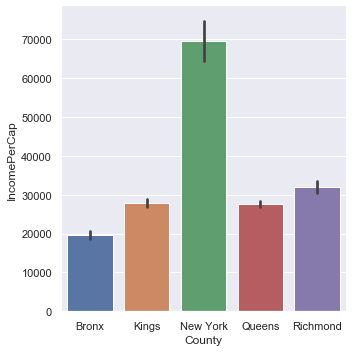

In [34]:
#Visualize the different distribution of average "Income Per Capita" per counties with a provided estimate of error.

#Displays the mean of the total "Income Per Capita" by County.
sns.catplot(x="County", y= "IncomePerCap", kind="bar", data = Disparities)

#New York demonstrating Income Per Capita greater than the national average(51,000).
#All remaining counties showing values below the national average median household income.

# ***We can infer that New York County residents are on average paid more than other counties with 
#one individual working per household.
#Also, Richmond and Queens typically will on average have two people working per household. 

In [35]:
#let us create a function that will take care of returning x and y values on passing it the data frame as data argument
# we will just pass the data to it
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""


    # Number of data points: n
    n = len(data)


    # x-data for the ECDF: x
    x = np.sort(data)


    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n


    return x, y

In [36]:
#let us generate dataframe for each county
ConvertedMain_Bronx = ConvertedMain.loc[ConvertedMain['County'] == 'Bronx']

ConvertedMain_Kings = ConvertedMain.loc[ConvertedMain['County'] == 'Kings']

ConvertedMain_NewYork = ConvertedMain.loc[ConvertedMain['County'] == 'New York']

ConvertedMain_Queens = ConvertedMain.loc[ConvertedMain['County'] == 'Queens']

ConvertedMain_Richmomnd = ConvertedMain.loc[ConvertedMain['County'] == 'Richmond']
#show the head of one of them
ConvertedMain_Bronx.head()

,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1,Bronx,5403,2659,2744,75.0,2.0,16.0,0.0,4.0,3639,...,2.0,0.0,0.0,43.0,2308,80.0,16.0,2.0,0.0,7.7
2,Bronx,5915,2896,3019,62.0,3.0,30.0,0.0,0.0,4100,...,1.0,0.0,2.0,45.0,2675,71.0,25.0,2.0,0.0,9.5
3,Bronx,5879,2558,3321,65.0,1.0,32.0,0.0,0.0,3536,...,8.0,1.0,1.0,38.8,2120,75.0,21.0,3.0,0.0,8.7
4,Bronx,2591,1206,1385,55.0,9.0,29.0,0.0,2.0,1557,...,3.0,2.0,6.0,45.4,1083,76.0,15.0,7.0,0.0,19.2
5,Bronx,8516,3301,5215,61.0,1.0,31.0,0.0,3.0,5436,...,4.0,1.0,0.0,46.0,2508,71.0,21.0,7.0,0.0,17.2


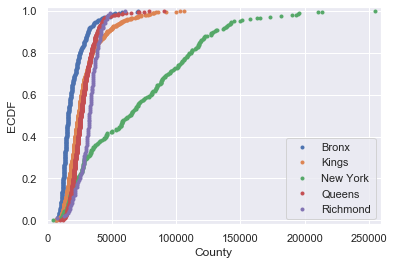

In [37]:
# Compute ECDFs passing the different data for the different counties:

#comput x, y for each county by calling the ecdf function and passing the county of interest
x_Bronx, y_Bronx = ecdf(ConvertedMain_Bronx['IncomePerCap'])
x_Kings, y_Kings = ecdf(ConvertedMain_Kings['IncomePerCap'])
x_NewYork, y_NewYork = ecdf(ConvertedMain_NewYork['IncomePerCap'])
x_Queens, y_Queens = ecdf(ConvertedMain_Queens['IncomePerCap'])
x_Richmond, y_Richmond = ecdf(ConvertedMain_Richmomnd['IncomePerCap'])

# Plot all ECDFs on the same plot
_ = plt.plot(x_Bronx, y_Bronx, marker = '.', linestyle = 'none')
_ = plt.plot(x_Kings, y_Kings, marker = '.', linestyle = 'none')
_ = plt.plot(x_NewYork, y_NewYork, marker = '.', linestyle = 'none')
_ = plt.plot(x_Queens, y_Queens, marker = '.', linestyle = 'none')
_ = plt.plot(x_Richmond, y_Richmond, marker = '.', linestyle = 'none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('Bronx', 'Kings', 'New York', 'Queens', 'Richmond'), loc='lower right')
_ = plt.xlabel('County')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

#Note: The ECDF shows a median IncomePerCap well-above 50,000 for New York and signficantly
#less than 50,000 for the remaining counties.

<BarContainer object of 5 artists>

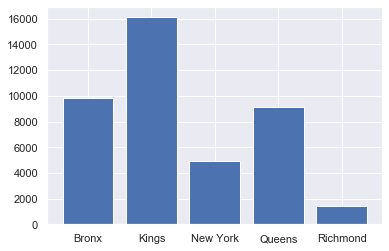

In [38]:
#Visualize the different distribution of people within "Poverty" per counties with a provided estimate of error.

#Create a list for the sum of Poverty population per County from pivotDisp
Poverty = list(pivotDisp["sum"]["Poverty"])

#Remove margin values (totals)
del Poverty[-1]

#Displays the total(sum of the) "Poverty" population by County.
plt.bar(county, Poverty, width=0.8, bottom=None, align='center', data=None)

#Kings, Bronx, and Queens county showing a staggering amount of poverty.

<BarContainer object of 5 artists>

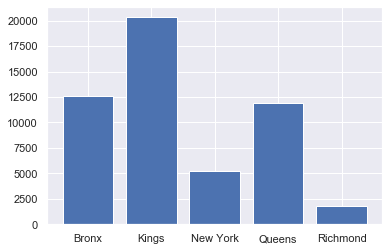

In [39]:
#Visualize the different distribution of people within "Child Poverty" per counties with a provided estimate of error.

#Create a list for the sum of Child Poverty population per County from pivotDisp
ChildPoverty = list(pivotDisp["sum"]["ChildPoverty"])

#Remove margin values (totals)
del ChildPoverty[-1]

#Displays the total(sum of the) "Child Poverty" population by County.
plt.bar(county, ChildPoverty, width=0.8, bottom=None, align='center', data=None)

#Kings, Bronx, and Queens county showing a staggering amount of child poverty. These values coincide with their poverty levels.

In [40]:
# Pearson's correlation test between Poverty and Child Poverty
#import the library
from scipy.stats import pearsonr
#Use the Poverty and Child Poverty columns from the Disparities dataframe
stat, p = pearsonr(Disparities["Poverty"], Disparities["ChildPoverty"])
print("stat = {0:.2f} p = {1}".format(stat, p))
if p > 0.05:
  print('Probably independent')
else:
 print('Probably dependent')

#There is strong evidence(from statistical testing) to reject the null hypothesis and suggest that the two columns(poverty &
# childpoverty) are dependent.

stat = 0.89 p = 0.0
Probably dependent


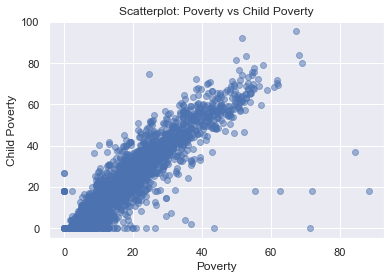

,TotalPop,Hispanic,White,Black,Native,Asian,Income,IncomePerCap,Poverty,ChildPoverty
TotalPop,1.000000,0.182856,-0.034156,-0.095852,-0.053550,-0.003979,-0.073688,0.064757,0.152784,0.132579
Hispanic,0.182856,1.000000,-0.494868,-0.149746,-0.016800,-0.175075,-0.483082,-0.384723,0.509348,0.513286
White,-0.034156,-0.494868,1.000000,-0.623190,-0.049286,-0.013869,0.547227,0.552431,-0.423375,-0.450873
Black,-0.095852,-0.149746,-0.623190,1.000000,0.001934,-0.429787,-0.235111,-0.271892,0.137346,0.153054
Native,-0.053550,-0.016800,-0.049286,0.001934,1.000000,0.053282,-0.027734,-0.015050,0.014548,0.006285
Asian,-0.003979,-0.175075,-0.013869,-0.429787,0.053282,1.000000,0.052983,-0.009058,-0.136770,-0.126583
Income,-0.073688,-0.483082,0.547227,-0.235111,-0.027734,0.052983,1.000000,0.818171,-0.713532,-0.693781
IncomePerCap,0.064757,-0.384723,0.552431,-0.271892,-0.015050,-0.009058,0.818171,1.000000,-0.494416,-0.506039
Poverty,0.152784,0.509348,-0.423375,0.137346,0.014548,-0.136770,-0.713532,-0.494416,1.000000,0.887862
ChildPoverty,0.132579,0.513286,-0.450873,0.153054,0.006285,-0.126583,-0.693781,-0.506039,0.887862,1.000000


In [41]:
#Plot a scatterplot between Poverty and Child Poverty for each block within New York City
#set the scatterplot
plt.scatter(Disparities["Poverty"], Disparities["ChildPoverty"], alpha=.5) 
#assign a title
plt.title('Scatterplot: Poverty vs Child Poverty')
#assign a x label
plt.xlabel('Poverty')
#assign a y label
plt.ylabel('Child Poverty')
plt.show()

#For the dataframe disparities, show all the possible correlations between the columns
Disparities.corr(method ='pearson')
#Note that ChildPoverty and Poverty are highly positively correlated (r = .88)
#Several other strong correlations appear
#Income and IncomePerCap (r = .81)
#Poverty and Income (r = -.71)
#Poverty IncomePerCap (r = -.49)
#ChildPoverty and Income (r = -.69)
#ChildPoverty and IncomePerCap (r = -.50)

#Generally poverty(general or child) is more correlated with Median Household Income compared to IncomePerCap.

## 3. Indicators of Wealth - Indicators

Previously we learned that there were wealth disparities present between the counties of New York (New York County being the most affluent, the Bronx being the least affluent, and the remaining counties showing comparable levels of wealth between the two extremes). Let us see if there are any other indicators that will continue to demonstrate such wealth disparities. <br> <br>
Questions <br> <br>
What are the mean and total values of job types(Professional, Office, Service, Construction, and Production) worked for each county?<br>
What are the mean and total values of "commuting means"(Driving, Carpool, Transit, Walking, Other, WorkAtHome) taken for each county?<br>
Is there any a correlation between Income and the "MeanCommute" time to work? <br><br><br>
Draw a conclusion if possible: Are the job types and "commuting means" suspected of higher social status(e.g.professional or WorkAtHome) present in greater amounts for the more affluent county(New York) and diminished in less affluent counties(Bronx)? In short, did we find additional indicators that New York county is wealthier whereas the Bronx is financially deficient? <br>

In [42]:
#Create a dataframe to group columns necessary to analyze job type
#disparities between the counties.
JobType = ConvertedMain[["County", "Employed", "Professional", "Service", "Office", "Construction", "Production"]].copy(deep = True)

#Create a pivot table to analyze the sum of the columns
#using aggfunc parameters np.sum
pivotJobType = pd.pivot_table(ConvertedMain, index= 'County', values= [ "Employed", "Professional", "Service", "Office", "Construction", "Production"], aggfunc= [ np.sum],margins=True)
pivotJobType = pivotJobType//1
pivotJobType



#Create lists variables that sum each of the job types grouped by county

Professional = list(pivotJobType["sum"]["Professional"])
del Professional[-1]

Service = list(pivotJobType["sum"]["Service"])
del Service[-1]

Office = list(pivotJobType["sum"]["Office"])
del Office[-1]

Construction = list(pivotJobType["sum"]["Construction"])
del Construction[-1]

Production = list(pivotJobType["sum"]["Production"])
del Production[-1]


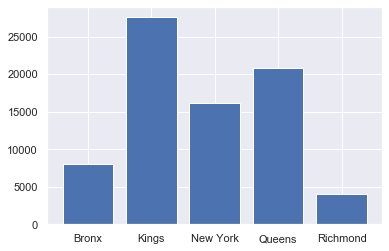

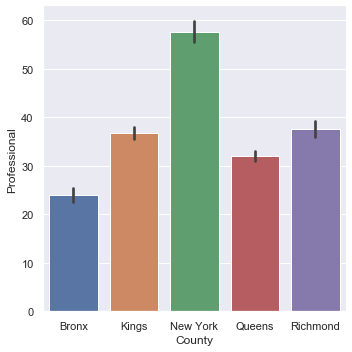

In [43]:
#Use a bar chart to visualize the "Professional" workforce by county.

#Displays the total(sum of the) "Professional" population by County.
plt.bar(county, Professional, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Professional" population by County.
sns.catplot(x="County", y= "Professional", kind="bar", data = JobType)


#Note: New York County is demonstrating the highest total of "professional" 
#workers, meanwhile the Bronx has the least "professional" workers.

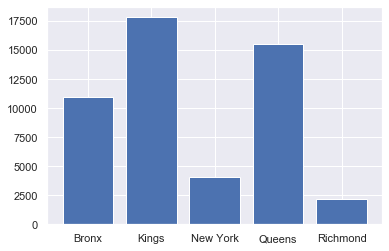

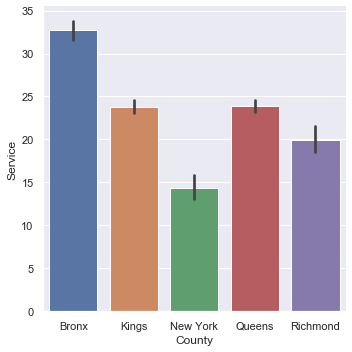

In [44]:
#Use a bar chart to visualize the "Service" workforce by county.

#Displays the total(sum of the) "Service" population by County.
plt.bar(county, Service, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Service" population by County.
sns.catplot(x="County", y= "Service", kind="bar", data = JobType)

#Note: Kings and Queens have a comparable lead of "Service" workers.
#Note: The Bronx shows the highest "Service" workers on average per block.
#Note: The Bronx shows a significantly greater number of average and total
#"Service" workers than New York

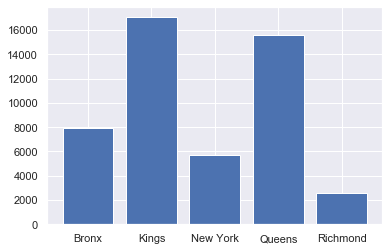

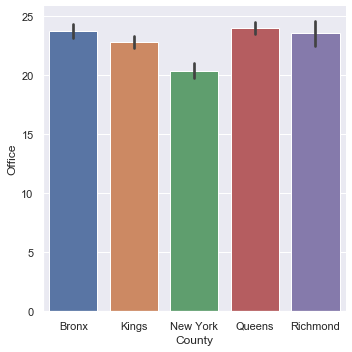

In [45]:
#Use a bar chart to visualize the "Office" workforce by county.

#Displays the total(sum of the) "Office" population by County.
plt.bar(county, Office, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Office" population by County.
sns.catplot(x="County", y= "Office", kind="bar", data = JobType)

#Note: New York shows the highest "Office" workers on average per block.
#Note: Kings and Queens shows have a comparable lead on total "Office" workers.
#Note: New York demonstrates approximately 50% more "Office" workers on average
#and total than the Bronx

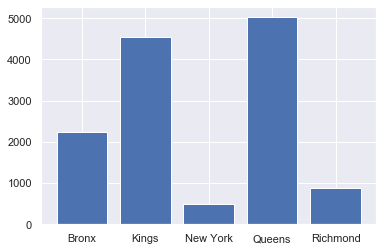

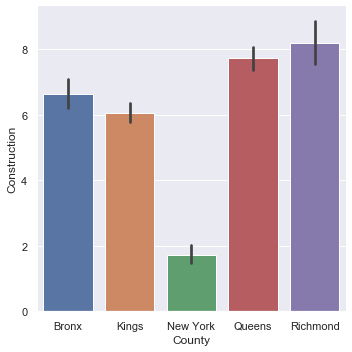

In [46]:
#Use a bar chart to visualize the "Construction" workforce by county.

#Displays the total(sum of the) "Construction" population by County.
plt.bar(county, Construction, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Construction" population by County.
sns.catplot(x="County", y= "Construction", kind="bar", data = JobType)

#Note: Richmond shows the highest "Construction" workers on average per block.
#Note: Kings and Queens shows have a significant lead on total "Construction" 
#workers.
#Note: The Bronx has approximately twice the number of construction workers 
#on average and total than New York.


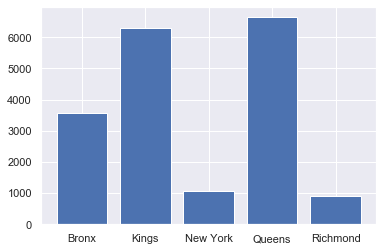

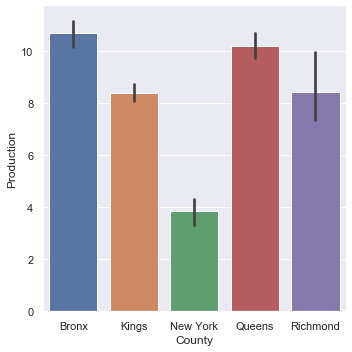

In [47]:
#Use a bar chart to visualize the "Production" workforce by county.

#Displays the total(sum of the) "Productionn" population by County.
plt.bar(county, Production, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Production" population by County.
sns.catplot(x="County", y= "Production", kind="bar", data = JobType)

#Note: Bronx and Queens shows have a significant lead on the average 
#"Production" workers per block
#Note: Kings and Queens shows have a significant lead on total "Production" 
#workers.
#Note: The Bronx demonstrates approximately 50% more "Production" workers on 
#average and total than the New York


Summary one: New York County has a propensity to house more "Professional" and "Office" workers among all counties. The Bronx houses significantly greater "Service", "Construction", and "Production" workers relative to New York with leading average per block in "Service" and "Production". <br><br>

Does this fit our previous data that New York is wealthier and the Bronx is least wealthy?

In [48]:
#Create a dataframe to group columns necessary to analyze "means of commuting"
#disparities between the counties.
Commuting = ConvertedMain[["County", "Employed", "Drive", "Carpool", "Transit", "Walk", "OtherTransp", "WorkAtHome"]].copy(deep = True)

#Create a pivot table to analyze the sum of the columns
#using aggfunc parameters np.sum
pivotCommuting = pd.pivot_table(ConvertedMain, index= 'County', values= [ "Employed", "Drive", "Carpool", "Transit", "Walk", "OtherTransp", "WorkAtHome", "MeanCommute"], aggfunc= [ np.sum],margins=True)
pivotCommuting = pivotCommuting//1
pivotCommuting

#Create lists variables that sum each of the commuting means grouped by county
Drive = list(pivotCommuting["sum"]["Drive"])
del Drive[-1]

Carpool = list(pivotCommuting["sum"]["Carpool"])
del Carpool[-1]

Transit = list(pivotCommuting["sum"]["Transit"])
del Transit[-1]

Walk = list(pivotCommuting["sum"]["Walk"])
del Walk[-1]

OtherTransp = list(pivotCommuting["sum"]["OtherTransp"])
del OtherTransp[-1]

WorkAtHome = list(pivotCommuting["sum"]["WorkAtHome"])
del WorkAtHome[-1]

MeanCommute = list(pivotCommuting["sum"]["MeanCommute"])
del MeanCommute[-1]


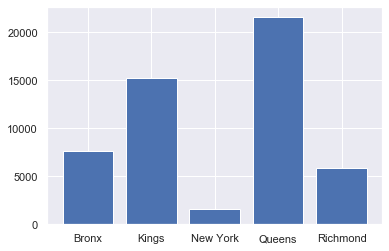

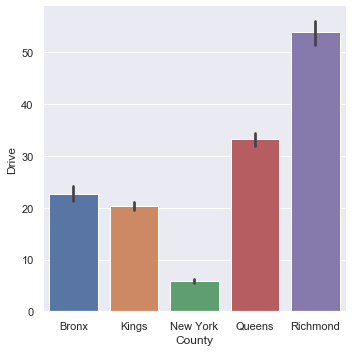

In [49]:
#Use a bar chart to visualize the "Drive" commuting by county.

#Displays the total(sum of the) "Drive" population by County.
plt.bar(county, Drive, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Drive" population by County.
sns.catplot(x="County", y= "Drive", kind="bar", data = Commuting)


#Note: New York County has the least total and average "Drivers".
#Note: Richmond has the highest average "Drivers".
#Note: Queens has the greatest total "Drivers".

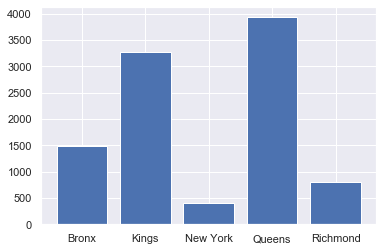

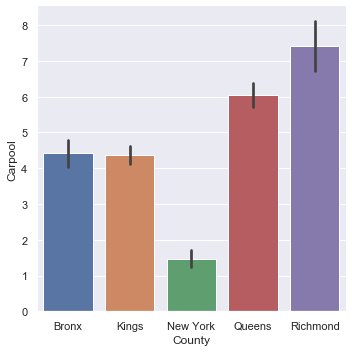

In [50]:
#Use a bar chart to visualize the "Carpool" commuting by county.

#Displays the total(sum of the) "Carpool" population by County.
plt.bar(county, Carpool, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Carpool" population by County.
sns.catplot(x="County", y= "Carpool", kind="bar", data = Commuting)


#Note: The trend mirrors that of the "Drivers".

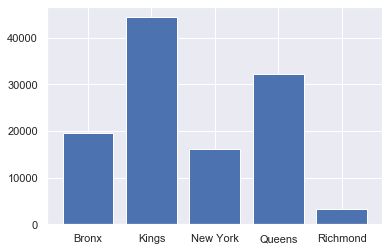

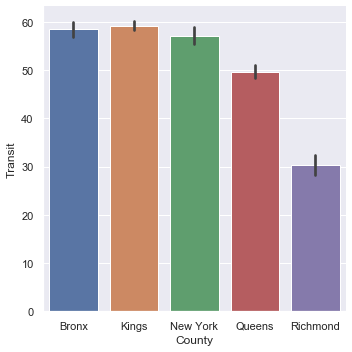

In [51]:
#Use a bar chart to visualize the "Transit" commuting by county.

#Displays the total(sum of the) "Transit" population by County.
plt.bar(county, Transit, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Transit" population by County.
sns.catplot(x="County", y= "Transit", kind="bar", data = Commuting)


#Note: The greatest average number of "Transit" commuters are from New York.
#Note: Kings has the greatest total "Transit" commuters.

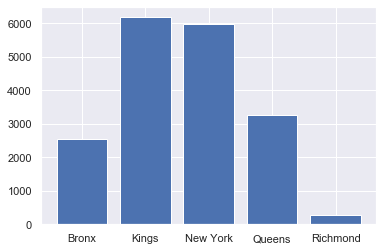

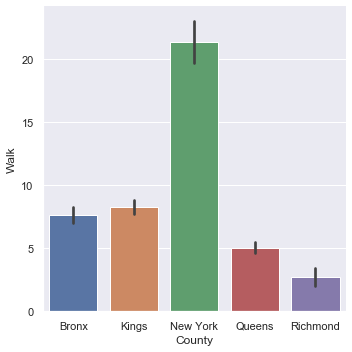

In [52]:
#Use a bar chart to visualize the "Walk" commuting by county.

#Displays the total(sum of the) "Walk" population by County.
plt.bar(county, Walk, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "Walk" population by County.
sns.catplot(x="County", y= "Walk", kind="bar", data = Commuting)


#Note: New York has the greatest total and average for "Walking" to work.
#Perhaps many jobs are local to New York County.

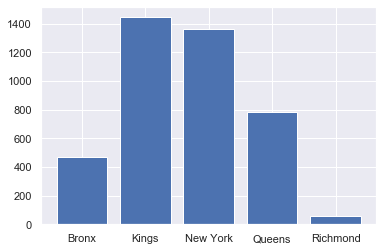

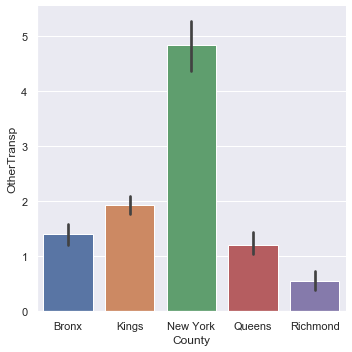

In [53]:
#Use a bar chart to visualize the "OtherTransp" commuting by county.

#Displays the total(sum of the) "OtherTransp" population by County.
plt.bar(county, OtherTransp, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "OtherTransp" population by County.
sns.catplot(x="County", y= "OtherTransp", kind="bar", data = Commuting)


#Note: New York has the greatest total and average for "Other" modes of 
#transportation to work.

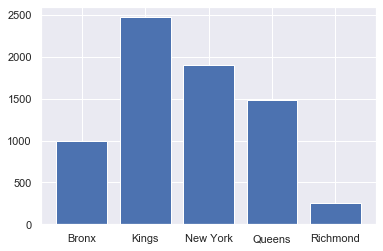

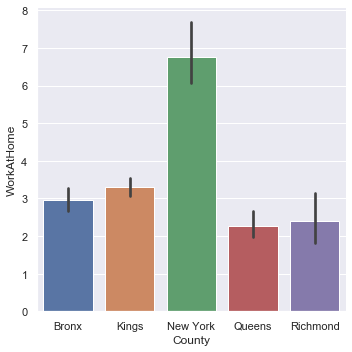

In [54]:
#Use a bar chart to visualize the "WorkAtHome" commuting by county.

#Displays the total(sum of the) "WorkAtHome" population by County.
plt.bar(county, WorkAtHome, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "WorkAtHome" population by County.
sns.catplot(x="County", y= "WorkAtHome", kind="bar", data = Commuting)


#Note: New York has the greatest total and average for "Working at home".

Summary two: New York County has a propensity to house more "WorkingAtHome", "Walk", and "Transit" commuters among all counties. The Bronx shows comparable commuting activity compared to the other the majority of counties for a given category. <br><br>

Does this fit our previous data that New York is wealthier and the Bronx is least wealthy?

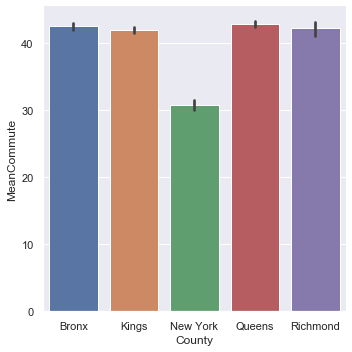

In [55]:
#Visualize the mean commute time by county
sns.catplot(x="County", y= "MeanCommute", kind="bar", data = ConvertedMain)
#Note: New York has the least commute time on average by ten minutes.

In [56]:
#Show the Correlation values between "MeanCommute" time and Income
correlationIncomeCommute = np.corrcoef(ConvertedMain["Income"], ConvertedMain["MeanCommute"])[0,1]
print("The correlation between Income and MeanCommute time to work is {:.2f}".format(correlationIncomeCommute))
print()
print("As income increases, commute times tend to decrease.")
#Note: ***Income is highest in New York and lowest in the bronx adding another indicator of wealth

#Plot a scatterplot to see visualize the negative correlation


The correlation between Income and MeanCommute time to work is -0.36

As income increases, commute times tend to decrease.


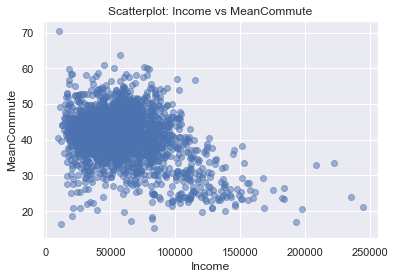

In [57]:
#Plot a scatterplot to see visualize the negative correlation between
#Income and MeanCommute

#set the scatterplot
plt.scatter(ConvertedMain["Income"], ConvertedMain["MeanCommute"], alpha=.5) 
#assign a title
plt.title('Scatterplot: Income vs MeanCommute')
#assign a x label
plt.xlabel('Income')
#assign a y label
plt.ylabel('MeanCommute')
plt.show()



<b><center>3. Conclusion to Indicator

We have found additional indicators supporting that New York is wealthier than the other counties and the Bronx is less wealthy than the other counties. <br>

Summary one: New York County has a propensity to house more "Professional" and "Office" among all counties. The Bronx houses significantly greater "Service", "Construction", and "Production" workers than New York with leading average per block in "Service" and "Production". <br><br>

Summary two: New York County has a propensity to house more "WorkingAtHome", "Walk", and "Transit" commuters among all counties. The Bronx shows comparable commuting activity compared to the other the majority of counties for a given category. <br><br>

Income is negatively correlated with income and as previously shown, New York has the highest Income and also shows the least average commute time.


## 4. Searching for our own Indicator - Sector

Previously we discovered data supporting that New York county is wealthier and the Bronx is less than wealthy than the other counties within New York City. Several of these inferences could be accepted on prima facie alone given one's experiences that develop into a "common sense", so to speak. For example, many may have predicted that New York county would have the highest income, that child poverty is positively correlated with general poverty, New York would have house the most "professional" and "office" workers, that income and mean commute times are negatively correlated, and so forth. However, there are instances in which we may not have preconcieved notions on a subject and many more instances in which our preconcieved notions are innaccurate. Big Data allows for evidence-based decisions to be made by meticously parsing and analyzing information. We will use our present skills to either support or refute a hypothesis for which the group could not unanimously agree.   <br> <br>
Question <br> <br>
Do the proportions of work category(Public, Private, SelfEmployed, and FamilyWork) also have a significant correlation with the county's social economic status? In other words, will these categories show more "private" employees in New York versus more "public" employees in the Bronx? <br><br><br>
<center>Hypothesis</center> <br>
We believe that New York will house a greater proportion of "Private" employees, meanwhile the Bronx will house a greater proportion of "Public" employees. This is because "Private" positions are generally compensated with a greater income than that of "Public" positions.

In [58]:
#Set a new dataframe for the job sector
dfSector = ConvertedMain[["County", "PrivateWork", "PublicWork", "SelfEmployed", "FamilyWork"]]
#Create a pivotTable for "PrivateWork" that will have the sums grouped by county
pivotSector = pd.pivot_table(ConvertedMain, index= 'County', values= [ "PrivateWork", "PublicWork", "SelfEmployed", "FamilyWork"], aggfunc= [ np.sum],margins=True)
#Truncate values
pivotSector = pivotSector//1
#Set up list variables for the sum of each job sector category
PrivateWork = list(pivotSector["sum"]["PrivateWork"])
del PrivateWork[-1]

PublicWork = list(pivotSector["sum"]["PublicWork"])
del PublicWork[-1]

FamilyWork = list(pivotSector["sum"]["FamilyWork"])
del FamilyWork[-1]

SelfEmployed = list(pivotSector["sum"]["SelfEmployed"])
del SelfEmployed[-1]




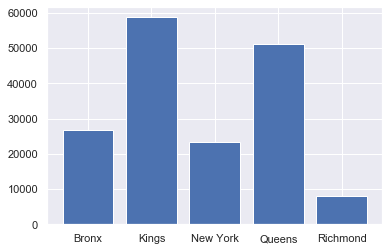

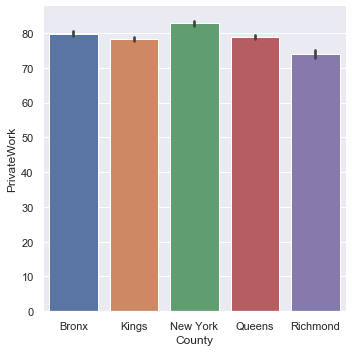

In [59]:
#Use a bar chart to visualize the "PrivateWork" sector by county.

#Displays the total(sum of the) "PrivateWork" population by County.
plt.bar(county, PrivateWork, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "PrivateWork" sector by County.
sns.catplot(x="County", y= "PrivateWork", kind="bar", data = dfSector)


#Note: New York demonstrates comparable levels of total and average "Private Work" compared to the Bronx.

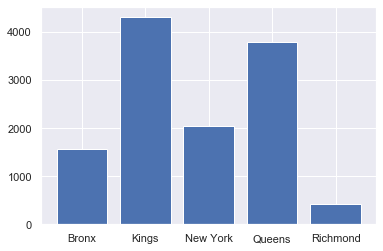

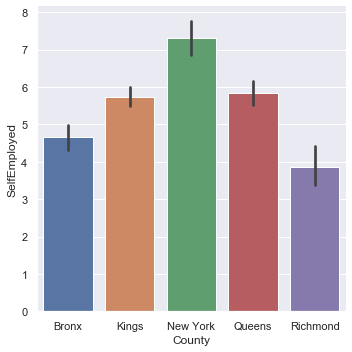

In [60]:
#Use a bar chart to visualize the "SelfEmployed" sector by county.

#Displays the total(sum of the) "SelfEmployed" population by County.
plt.bar(county, SelfEmployed, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "SelfEmployed" sector by County.
sns.catplot(x="County", y= "SelfEmployed", kind="bar", data = dfSector)


#Note: The New York shows the greatest average "SelfEmployed" employees and has a 30% lead compared to the Bronx
#on the sum

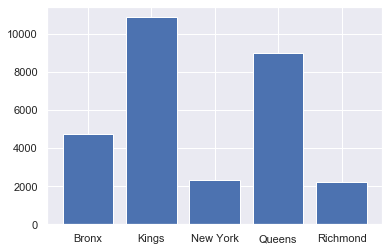

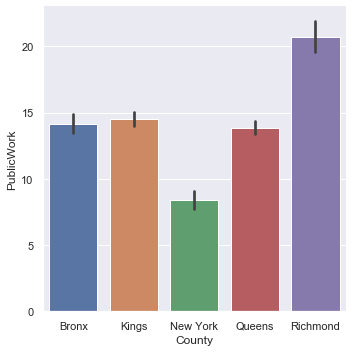

In [61]:
#Use a bar chart to visualize the "PublicWork" sector by county.

#Displays the total(sum of the) "PublicWork" population by County.
plt.bar(county, PublicWork, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "PublicWork" sector by County.
sns.catplot(x="County", y= "PublicWork", kind="bar", data = dfSector)


#Note: The Bronx shows a higher 50% average and sum of "PublicWork" employees compared to New York


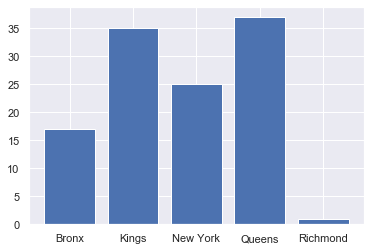

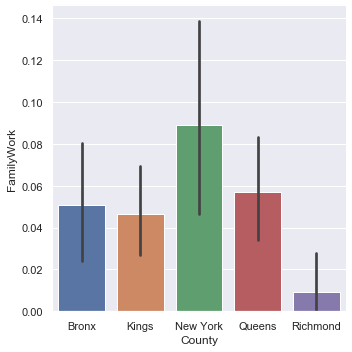

In [62]:
#Use a bar chart to visualize the "FamilyWork" sector by county.

#Displays the total(sum of the) "FamilyWork" population by County.
plt.bar(county, FamilyWork, width=0.8, bottom=None, align='center', data=None)
#Displays the mean of the total "FamilyWork" sector by County.
sns.catplot(x="County", y= "FamilyWork", kind="bar", data = dfSector)


#Note: The New York shows a greater and total of "FamilyWork" employees compared to the Bronx
#although the values for all counties are marginal.

Summary one: <br>
1. New York and the Bronx have comparable values for "PrivateWork" employees. (Hypothesis not supported)
2. New York has the greatest average "SelfEmployed" employees and a 30% lead on the sum compared to the Bronx. (Hypothesis supported)
3. The Bronx shows a higher 50% average and sum of "PublicWork" compared to New York. (Hypothesis supported)
4. New York shows a greater sum of "FamilyWork" employees compared to the Bronx although values for all counties appear to be marginal. (Hypothesis not supported)

## Statistical Testing

In [63]:
#Create new dataframes for the two counties of interest and job sector Private
pvBronx = dfSector[["County", "PrivateWork"]].loc[dfSector["County"] == "Bronx"]
pvNY = dfSector[["County", "PrivateWork"]].loc[dfSector["County"] == "New York"]

#Extract a list of values of the Private employees for the two counties
listBronx = list(pvBronx["PrivateWork"])
listNY = list(pvNY["PrivateWork"])

#Create a "new" dataframe that will have both listed added as columns
new = pd.DataFrame(listBronx, columns = ["Bronx"])
new["New York"] = pd.Series(listNY) 


#Create a new dataframe for the Private values that correspond to a single county
#and also drop null values
Private = pd.melt(new,var_name="County", value_name="PrivateWork")
Private.dropna(inplace = True)

#Group the dataframe to analyze the sum, count, mean, and standard deviation for
#Private employees for the two counties
groupedPrivate = Private.groupby(['County'])['PrivateWork']
groupedPrivate.aggregate([np.sum, "count", np.mean, np.std]).round(2)


#Note: the mean values are centered around 81 for the Bronx and New York.
#Note: there are incredibly similar values including sum, mean, and std.

,sum,count,mean,std
County,,,,
Bronx,26716.0,335,79.75,6.59
New York,23266.0,281,82.80,6.10


In [64]:
# we are going to import the ztest from statsmodels.stats.weightstats
from statsmodels.stats.weightstats import ztest
#import the other required libraries
import scipy.stats as stats

#Perform a one-tailed z test to see whether New York has a larger mean value than 81
(test_statistic, p_value) = ztest(listNY, value=81, alternative='larger', ddof=1.0)

In [65]:
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,10))

#There is significant evidence to reject the null hypothesis and lend support
#that New York is above the value 81 for mean "Private" employees

The test statistic is:  4.93803
The p-value is:  3.946e-07


In [66]:
#Perform a one-tailed z test to see whether the Bronx has a smaller mean value than 81
(test_statistic, p_value) = ztest(listBronx, value=81, alternative='smaller', ddof=1.0)

In [67]:
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,10))

#There is significant evidence to reject the null hypothesis and lend support
#that the Bronx is below the value 81 for mean "Private" employees

The test statistic is:  -3.4743
The p-value is:  0.0002560978


In [68]:
#Create new dataframes for the two counties of interest and job sector Public
pbBronx = dfSector[["County", "PublicWork"]].loc[dfSector["County"] == "Bronx"]
pbNY = dfSector[["County", "PublicWork"]].loc[dfSector["County"] == "New York"]

#Extract a list of values of the Public employees for the two counties
listBronx = list(pbBronx["PublicWork"])
listNY = list(pbNY["PublicWork"])

#Create a "new" dataframe that will have both listed added as columns
new = pd.DataFrame(listBronx, columns = ["Bronx"])
new["New York"] = pd.Series(listNY) 


#Create a new dataframe for the Public values that correspond to a single county
#and also drop null values
Public = pd.melt(new,var_name="County", value_name="PublicWork")
Public.dropna(inplace = True)

#Group the dataframe to analyze the sum, count, mean, and standard deviation for
#Public employees for the two counties
groupedPublic = Public.groupby(['County'])['PublicWork']
groupedPublic.aggregate([np.sum, "count", np.mean, np.std]).round(2)

#Note: the mean values are centered around 11 for the Bronx and New York.
#Note: there are differences between the two counties for sum, mean, and std.

,sum,count,mean,std
County,,,,
Bronx,4739.0,335,14.15,6.70
New York,2351.0,281,8.37,5.33


In [69]:
#Perform a one-tailed z test to see whether Bronx has a larger mean value than 11
(test_statistic, p_value) = ztest(listBronx, value=11, alternative='larger', ddof=1.0)

In [70]:
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,21))

#There is a significant amount of evidence to reject the null hypothesis 
#and lend support that the number of"public" employees in the Bronx is greater 
#than 11

The test statistic is:  8.59995
The p-value is:  3.988e-18


In [71]:
#Perform a one-tailed z test to see whether New York has a smaller 
#mean value than 11
(test_statistic, p_value) = ztest(listNY, value=11, alternative='smaller', ddof=1.0)

In [72]:
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,20))

#There is a significant amount of evidence to reject the null hypothesis 
#and lend support that the number of"public" employees in New  York
#is smaller than 11

The test statistic is:  -8.28504
The p-value is:  5.903e-17


**Conclusion**

1. New York demonstrates comparable levels of total and average "Private Work" compared to the Bronx with data visualizations.
2. However, according to hypothesis testing there is signficant evidence to conclude that New York has a mean "PrivateWork" value greater than 81 meanwhile the Bronx was smaller than 81. <br> <br>
This leads me to believe that there is a statistical difference with New York having a greater amount of "Private" employees than the Bronx. <br> <br>

3. The Bronx shows a higher 50% average and sum of "PublicWork" employees compared to New York according to data visualizations.
4. Hypothesis testing indicates signficant evidence to conclude that the Bronx has a mean "PublicWork" value greater than 11 meanwhile New York has a smaller value than 11. <br> <br>
This leads me to believe that there is a statistical difference with the Bronx having a greater amount of "Public" employees than New York. <br> <br>

In short, New York shows a greater wealth than the Bronx and it can be supported by a number of indicators including income, poverty, mean commute times, proportions of job types help, proportions of commuting times for the residents, and including proportions of job sectors within the counties.

**Thank you for your time!**